In [40]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv("advertising.csv")

In [42]:
len(df)

200

In [43]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [46]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [48]:
import matplotlib.pyplot as plt

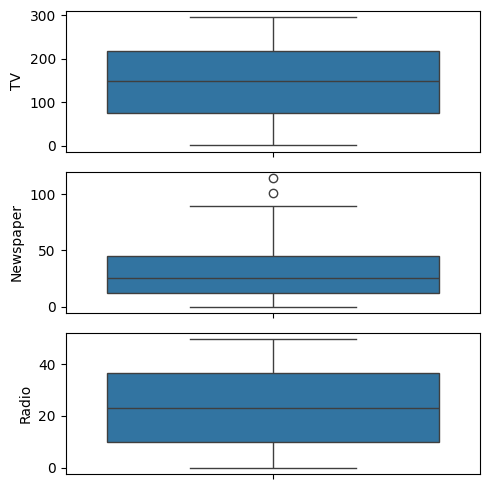

In [49]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

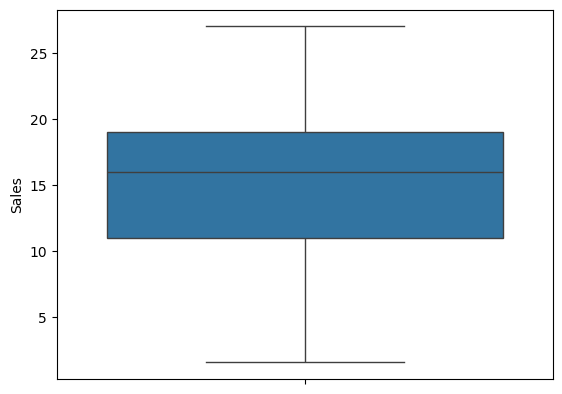

In [50]:
sns.boxplot(df['Sales'])
plt.show()

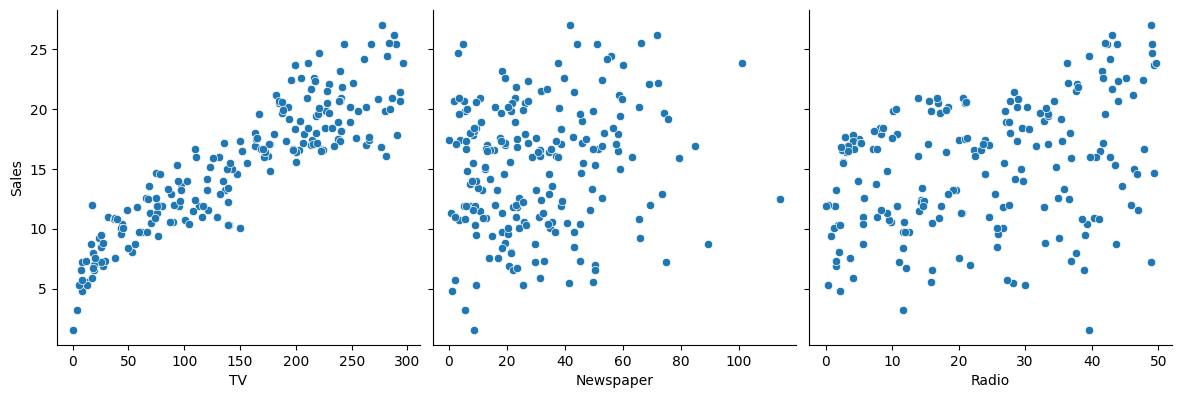

In [51]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

/var/folders/gx/f5cby5fx3z910tgl4z83fbg40000gn/T/ipykernel_54673/1552534899.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],bins=50,color='r',ax=ax)


Text(0.5, 1.0, 'Distribution of Sales')

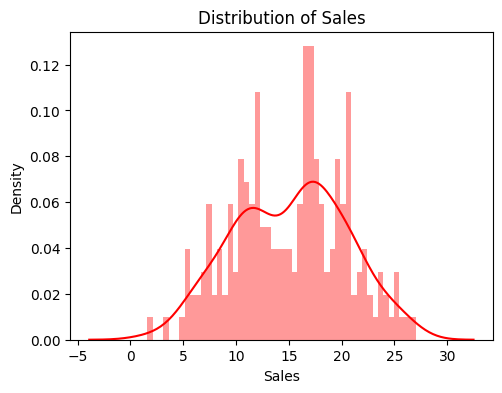

In [52]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Sales'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Sales')


In [53]:
df["Sales"] = np.log1p(df["Sales"].values)

/var/folders/gx/f5cby5fx3z910tgl4z83fbg40000gn/T/ipykernel_54673/2968928577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],bins=50,color='r',ax=ax)


Text(0.5, 1.0, 'Distribution of Sales (Log)')

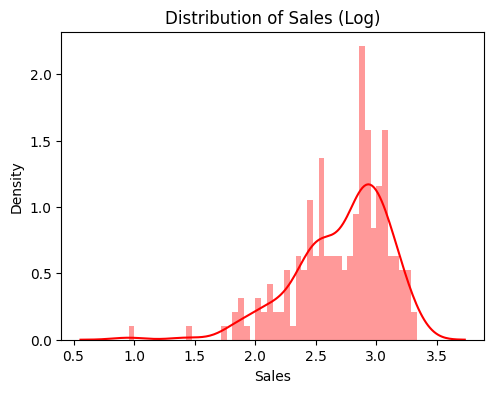

In [54]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Sales'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Sales (Log)')


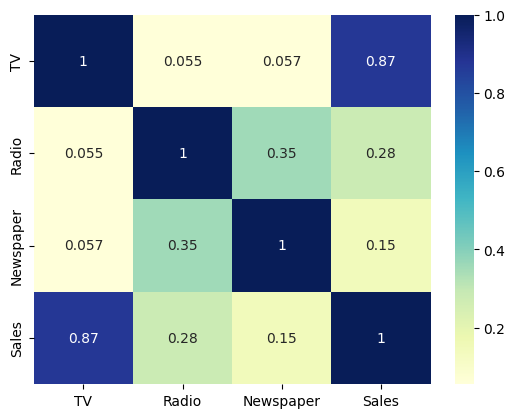

In [55]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [56]:
from sklearn.metrics import mutual_info_score

In [57]:
def mutual_info_sales(series):
    return mutual_info_score(series, df.Sales)

In [58]:
features = ['TV', 'Radio', 'Newspaper']
mi = df[features].apply(mutual_info_sales)
mi.sort_values(ascending=False)

/Users/ayehninnkhine/.local/share/virtualenvs/MLZoomcamp-Midterm-Project-JjSwv5fr/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/ayehninnkhine/.local/share/virtualenvs/MLZoomcamp-Midterm-Project-JjSwv5fr/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/ayehninnkhine/.local/share/virtualenvs/MLZoomcamp-Midterm-Project-JjSwv5fr/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


TV           4.604989
Newspaper    4.472373
Radio        4.447264
dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [61]:
y_train = df_train.Sales.values
y_test = df_test.Sales.values

del df_train['Sales']
del df_test['Sales']

In [62]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)

In [63]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression()

In [65]:
y_pred = lin_reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
r2= r2_score(y_pred, y_test)
print('Mean Square Error(MSE):',mse)
print('Root Mean Square Error(RMSE):',rmse)
print('R2 score:', r2)

Mean Square Error(MSE): 0.012345565518540928
Root Mean Square Error(RMSE): 0.11111060038781596
R2 score: 0.8639063710649988


In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [68]:
dv.get_feature_names_out()


array(['Newspaper', 'Radio', 'TV'], dtype=object)

In [69]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = dt.feature_importances_
df_importances.sort_values(by='importance', ascending=False)

,feature,importance
2,TV,1.0
0,Newspaper,0.0
1,Radio,0.0


In [70]:
y_pred_dt = dt.predict(X_test)

In [71]:
mse = mean_squared_error(y_pred_dt, y_test)
rmse = mean_squared_error(y_pred_dt, y_test, squared=False)
r2= r2_score(y_pred_dt, y_test)
print('Mean Square Error(MSE):',mse)
print('Root Mean Square Error(RMSE):',rmse)
print('R2 score:', r2)

Mean Square Error(MSE): 0.04718165682572915
Root Mean Square Error(RMSE): 0.21721339007006255
R2 score: -0.05131371434768428


In [72]:
from sklearn.ensemble import RandomForestRegressor
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators = n, 
                                   max_depth = d, 
                                   random_state = 1, 
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        scores.append((d, n, rmse))

In [73]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.064923
1,10,20,0.063032
2,10,30,0.060267
3,10,40,0.062051
4,10,50,0.062691
...,...,...,...
75,25,160,0.059381
76,25,170,0.059219
77,25,180,0.059241
78,25,190,0.059180


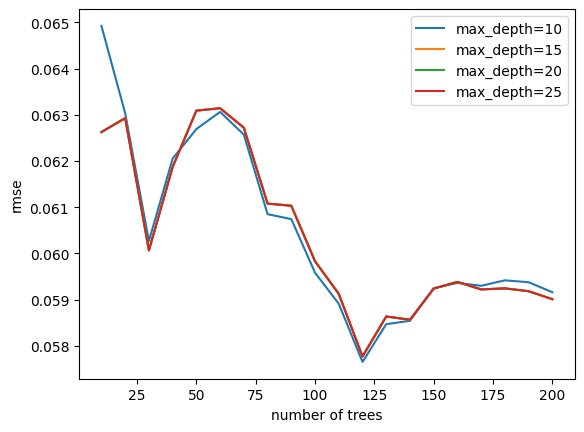

In [74]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('rmse')
plt.show()

In [75]:
rf = RandomForestRegressor(n_estimators = 125,
                           max_depth = 25,
                           random_state = 1,
                           n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=125, n_jobs=-1, random_state=1)

In [76]:
y_pred_rf = rf.predict(X_test)

In [77]:
mse = mean_squared_error(y_pred_rf, y_test)
print('The Mean Square Error(MSE) RF:',mse)

The Mean Square Error(MSE) RF: 0.0034271600292347998


In [78]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False)

,feature,importance
2,TV,0.909674
1,Radio,0.074950
0,Newspaper,0.015376
